In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [5]:
df = pd.read_csv('연도별_시간대별_사고건수_비율.csv')

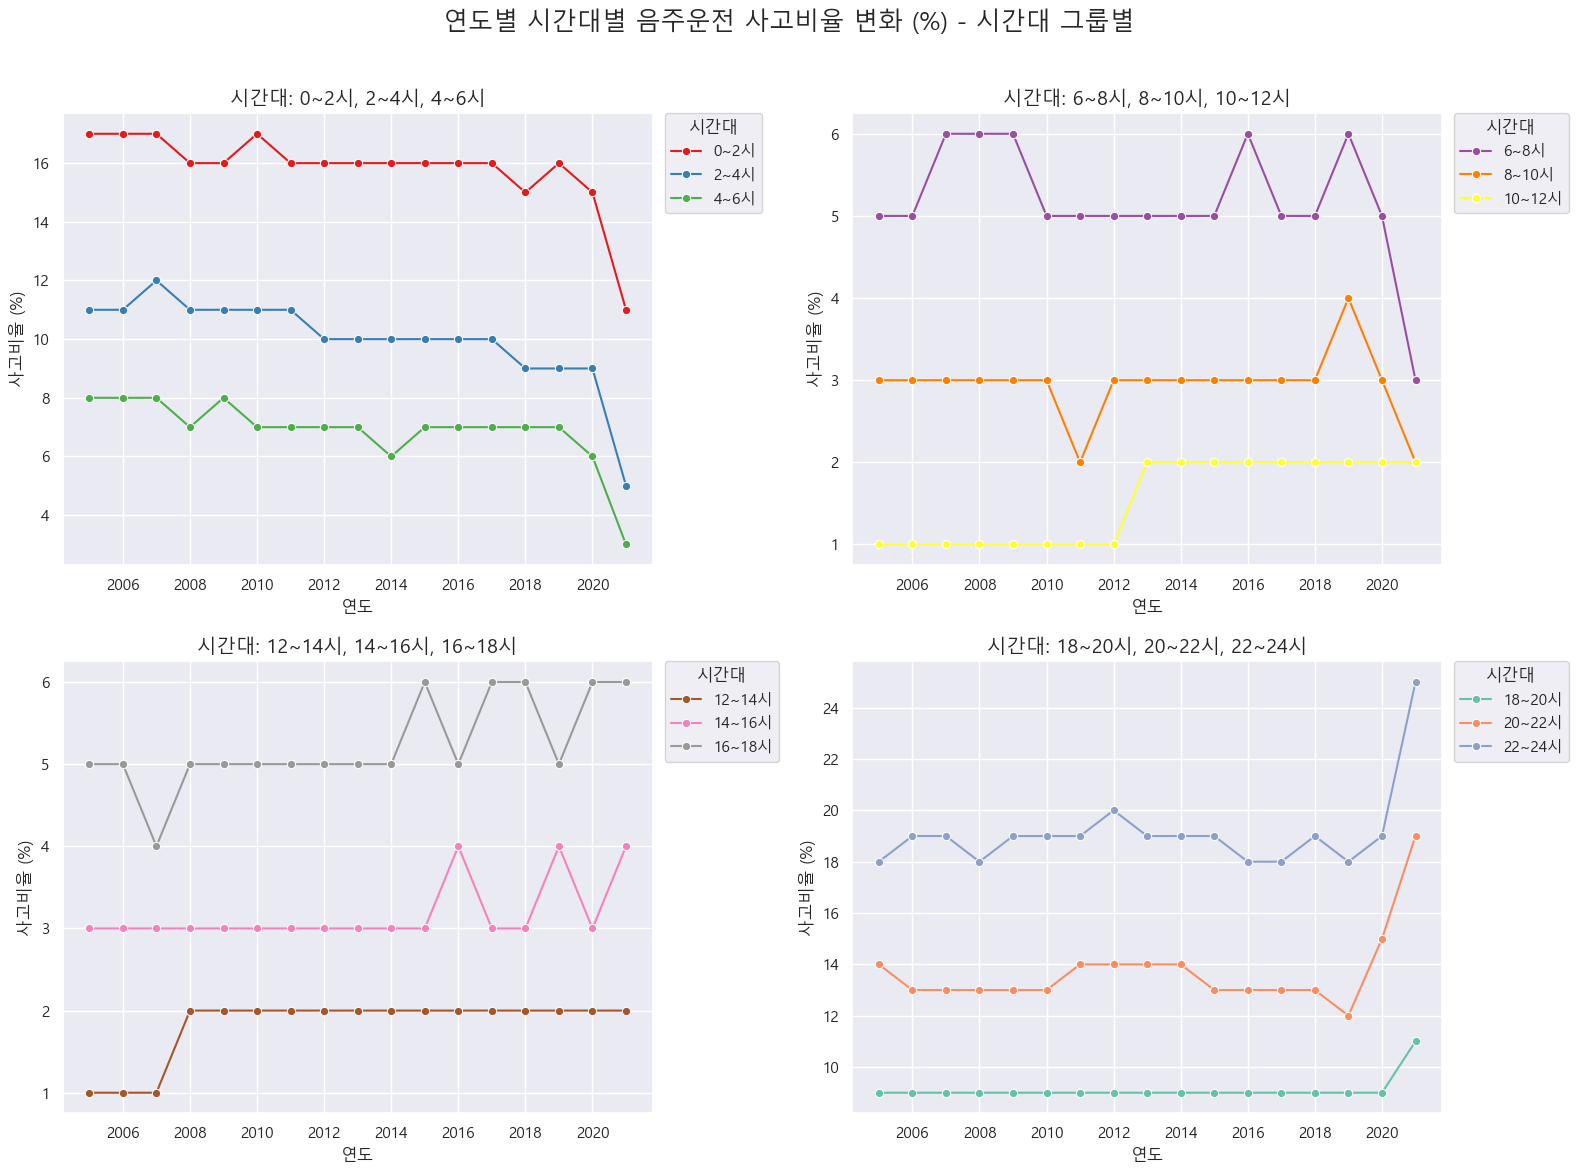

In [11]:
# 시간대 정렬 기준
time_order = ['0~2시', '2~4시', '4~6시', '6~8시', 
              '8~10시', '10~12시', '12~14시', '14~16시', 
              '16~18시', '18~20시', '20~22시', '22~24시']

# 시간대 그룹 4개로 분할
time_groups = [
    time_order[0:3],  # 0~6시
    time_order[3:6],  # 6~12시
    time_order[6:9],  # 12~18시
    time_order[9:12]  # 18~24시
]

# 시간대 색상 매핑 딕셔너리 (Set1 ~ Dark2 계열 등 조합)
full_color_map = {
    '0~2시': '#e41a1c', '2~4시': '#377eb8', '4~6시': '#4daf4a',
    '6~8시': '#984ea3', '8~10시': '#ff7f00', '10~12시': '#ffff33',
    '12~14시': '#a65628', '14~16시': '#f781bf', '16~18시': '#999999',
    '18~20시': '#66c2a5', '20~22시': '#fc8d62', '22~24시': '#8da0cb'
}

# 시간대 카테고리로 변환
df['시간대'] = pd.Categorical(df['시간대'], categories=time_order, ordered=True)
df = df.sort_values(by='시간대')

# subplot 생성
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# 각 subplot 반복
for i, group in enumerate(time_groups):
    subset = df[df['시간대'].isin(group)]
    
    # 해당 그룹의 색상만 추출
    palette_dict = {k: full_color_map[k] for k in group}
    
    sns.lineplot(
        data=subset,
        x='연도',
        y='사고비율',
        hue='시간대',
        palette=palette_dict,
        hue_order=group,
        marker='o',
        ax=axes[i]
    )
    axes[i].set_title(f"시간대: {', '.join(group)}", fontsize=14)
    axes[i].set_ylabel('사고비율 (%)')
    axes[i].set_xlabel('연도')
    axes[i].grid(True)
    
    # 범례를 그래프 바깥쪽에 고정
    axes[i].legend(
        title='시간대',
        bbox_to_anchor=(1.02, 1),
        loc='upper left',
        borderaxespad=0
    )

plt.suptitle('연도별 시간대별 음주운전 사고비율 변화 (%) - 시간대 그룹별', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()